In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import mnist

#import google driver
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
names = ['null.jpg', 'one.jpg', 'two.jpg', 'three.jpg', 'four.jpg', 'five.jpg', 'six.jpg', 'seven.jpg', 'eight.jpg', 'nine.jpg']

numbers_list = []

path = '/content/drive/MyDrive/kursovaya/'
prom = ''

for elem in names:
  prom = path + str(elem)
  img = cv2.imread(prom, cv2.IMREAD_GRAYSCALE)
  numbers_list.append(img)
  print(elem, '-', img.shape)

numbers_test = np.array(numbers_list)

print('Размер новой выборки:', numbers_test.shape[0])

null.jpg - (28, 28)
one.jpg - (28, 28)
two.jpg - (28, 28)
three.jpg - (28, 28)
four.jpg - (28, 28)
five.jpg - (28, 28)
six.jpg - (28, 28)
seven.jpg - (28, 28)
eight.jpg - (28, 28)
nine.jpg - (28, 28)
Размер новой выборки: 10


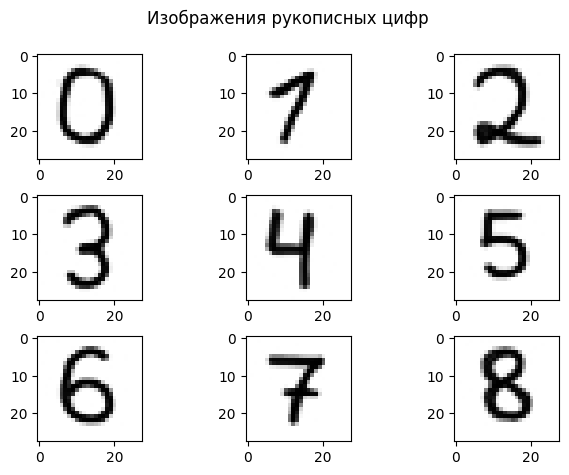

In [3]:
fig, axs = plt.subplots(nrows= 3 , ncols= 3 )
fig.suptitle('Изображения рукописных цифр')
fig. tight_layout (h_pad= 0.5 )
axs[0, 0].imshow(numbers_test[0], cmap='binary')
#axs[0, 0].imshow(numbers_test[0], interpolation='nearest')
axs[0, 1].imshow(numbers_test[1], cmap='binary')
axs[0, 2].imshow(numbers_test[2], cmap='binary')
axs[1, 0].imshow(numbers_test[3], cmap='binary')
axs[1, 1].imshow(numbers_test[4], cmap='binary')
axs[1, 2].imshow(numbers_test[5], cmap='binary')
axs[2, 0].imshow(numbers_test[6], cmap='binary')
axs[2, 1].imshow(numbers_test[7], cmap='binary')
axs[2, 2].imshow(numbers_test[8], cmap='binary')
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
60000 60000 10000 60000
(28, 28) uint8


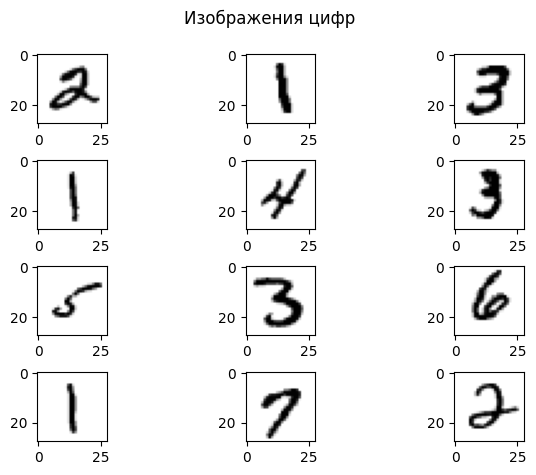

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 64)            2112      
                                                                 
 dense_2 (Dense)             (None, 28, 128)           8320      
                                                                 
 dense_3 (Dense)             (None, 28, 256)           33024     
                                                                 
 dense_4 (Dense)             (None, 28, 512)           131584    
                                                                 
 flatten (Flatten)           (None, 14336)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                1

Epoch 1/20
96/96 [==============================] - 27s 265ms/step - loss: 0.1802 - binary_accuracy: 0.9396 - val_loss: 0.0508 - val_binary_accuracy: 0.9837
Epoch 2/20
96/96 [==============================] - 26s 267ms/step - loss: 0.0452 - binary_accuracy: 0.9850 - val_loss: 0.0380 - val_binary_accuracy: 0.9877
Epoch 3/20
96/96 [==============================] - 25s 260ms/step - loss: 0.0363 - binary_accuracy: 0.9883 - val_loss: 0.0340 - val_binary_accuracy: 0.9894
Epoch 4/20
96/96 [==============================] - 24s 253ms/step - loss: 0.0323 - binary_accuracy: 0.9895 - val_loss: 0.0324 - val_binary_accuracy: 0.9901
Epoch 5/20
96/96 [==============================] - 25s 256ms/step - loss: 0.0301 - binary_accuracy: 0.9903 - val_loss: 0.0313 - val_binary_accuracy: 0.9903
Epoch 6/20
96/96 [==============================] - 25s 258ms/step - loss: 0.0277 - binary_accuracy: 0.9911 - val_loss: 0.0298 - val_binary_accuracy: 0.9909
Epoch 7/20
96/96 [==============================] - 25s 25

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(len(X_train), len(y_train), len(X_test), len(y_train))

print(X_train[0].shape,X_train[0].dtype)

fig, axs = plt.subplots(nrows= 4 , ncols= 3 )
fig.suptitle('Изображения цифр')
fig. tight_layout (h_pad= 0.5 )
axs[0, 0].imshow(X_train[5], cmap='binary')
axs[0, 1].imshow(X_train[6], cmap='binary')
axs[0, 2].imshow(X_train[7], cmap='binary')
axs[1, 0].imshow(X_train[8], cmap='binary')
axs[1, 1].imshow(X_train[9], cmap='binary')
axs[1, 2].imshow(X_train[10], cmap='binary')
axs[2, 0].imshow(X_train[11], cmap='binary')
axs[2, 1].imshow(X_train[12], cmap='binary')
axs[2, 2].imshow(X_train[13], cmap='binary')
axs[3, 0].imshow(X_train[14], cmap='binary')
axs[3, 1].imshow(X_train[15], cmap='binary')
axs[3, 2].imshow(X_train[16], cmap='binary')
plt.show()

X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train[0].shape)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy',
            optimizer = Adam(lr=0.00024),
             metrics = ['binary_accuracy'])

stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=6)

history = model.fit(X_train, y_train, batch_size=500, verbose=1,
                    epochs= 20, validation_split = 0.2, callbacks=[stop])

pred = model.predict(numbers_test)

for n, e in zip(pred, names):
  print(n, e)

In [5]:
for i in range(len(pred)):
    for j in range(10):
        if(pred[i][j]>0.9):
            pred[i][j]=1
        else:
            pred[i][j]=0

for n, e in zip(pred, names):
  print(n, e)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] null.jpg
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] one.jpg
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] two.jpg
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] three.jpg
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] four.jpg
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] five.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] six.jpg
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] seven.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] eight.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] nine.jpg


In [6]:
images = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

counter = 0

for elem_one, elem_two in zip(pred, images):
  elem_one = list(elem_one)
  if elem_one.index(max(elem_one)) == elem_two:
    counter += 1

print('Точность:', (counter / len(images)) * 100)

Точность: 70.0
